<a href="https://colab.research.google.com/github/camylla-ops/Projeto-Analise-Acidentes-Rodovias-BR/blob/main/Projeto_An%C3%A1lise_de_dados_Acidentes_de_Tr%C3%A2nsito_em_Rodovias_Federais_no_Brasil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Análise de dados - Acidentes de Trânsito em Rodovias Federais no Brasil

Projeto desenvolvido durante o programa iFood|Vem Ser Tech por:

*   Bruna Dias
*   Camylla Oliveira
*   Eliane Patrício
*   Nayla Andrade
*   Rodrigo Freitas



# Informações da Base de Dados

O conjunto de dados contém informações sobre acidentes em rodovias federais no Brasil, de 2007 a 2022. Algumas das informações disponíveis incluem data e hora, causa do acidente, tipo de acidente, classificação (com/sem vítimas), condições climáticas no dia e mais.

#Fonte dos Dados

Os dados foram obtidos no Kaggle através do seguinte link: https://www.kaggle.com/datasets/rafaelborgesgraunke/traffic-accidents-brazil-pt-br/data

# Problema de negócio


### **Essas são as perguntas que respondemos nas análises:**

Esta análise tem como objetivo explorar dados de acidentes em rodovias federais no Brasil, destacando questões relevantes para uma compreensão abrangente do cenário:

* Em qual Estado ocorre mais acidentes?
* Qual a quantidade de mortos em acidentes por Estado?
* Em qual estado ocorre mais acidentes por capotamento ?
* Quais são as causas mais frequentes de acidentes nas rodovias federais?
* Qual a relação entre municipios e causas de acidentes?
* Qual municipio ou uf tem mais acidentes?
* Existe alguma relação entre o dia da semana e a quantidade de feridos graves?
* Qual dia da semana tem mais acidentes?
* Qual dia da semana tem menos acidentes?
* Em qual horário ocorre mais acidentes e qual é o horario mais seguro?
* Existe alguma relação entre a condição metereológica e o tipo de acidente?
* Qual a evolução de acidentes ao passar dos anos?
* Qual tipo de pista possui mais acidentes?
* Existe alguma relação entre o tipo de pista e a quantidade de vítimas fatais?
* Quais as BR's com maior incidência de acidentes?

Essas questões visam guiar uma análise abrangente dos dados, fornecendo insights cruciais para compreender os padrões e tomar decisões sobre medidas preventivas e estratégias de segurança viária.

# Legenda de Dados


data_inversa: Data que ocorreu o acidente

dia_semana: Dia que ocorreu o acidente

horario: Horario

uf: Estado

br: rodovia

km: Quilômetro da rodovia onde ocorreu o acidente.

municipio:

causa_acidente: Causas relacionadas ao desrespeito das leis de trânsito.

tipo_acidente: Classificação por tipo de colisão.

classificacao_acidente: Se houve vítimas e tipo de vitima

fase_dia: Período do dia; noite, ao amanhecer, anoitecer.

sentido_via: Se via está no sentido crescente ou decrescente.

condicao_metereologica: Situação do clima no momento do acidente.

tipo_pista: Informa se a pista é simples, dupla ou mútipla

tracado_via: Se ocorreu em curva, reta, ponte, túnel e outros.

uso_solo: Tipo de solo Rural ou Urbano

ano:

pessoas: Quantidade de pessoas envolvidas no acidente

mortos: Quantidade de óbitos  

feridos_leves:

feridos_graves:

ilesos:

ignorados:

feridos:

veiculos: quantidade de veículos envolvidos no acidente

latitude:

 longitude:

 regional:

 delegacia:








# Instalação de pacotes/bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Extração - 1) Leitura de arquivo com dados

In [3]:
#Extraindo o arquivo do google drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/datatran2007-2022.csv"
df = pd.read_csv(path)

Mounted at /content/drive


<ipython-input-3-95e30633894b>:4: DtypeWarning: Columns (5,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10/11/2009,Terça,14:10:00,MG,381.0,495.0,BETIM,Velocidade incompatível,Colisão traseira,Com Vítimas Feridas,...,0,1,0,4,2,NaN,NaN,NaN,NaN,NaN
1,16/10/2009,Sexta,04:35:00,MG,251.0,419.6,GRAO MOGOL,Outras,Colisão frontal,Com Vítimas Fatais,...,5,0,0,5,2,NaN,NaN,NaN,NaN,NaN
2,20/09/2009,Domingo,20:00:00,PI,316.0,24.0,TERESINA,Dormindo,Saída de Pista,Com Vítimas Feridas,...,4,0,0,6,1,NaN,NaN,NaN,NaN,NaN
3,17/05/2009,Domingo,15:45:00,RJ,101.0,429.0,MANGARATIBA,Falta de atenção,Colisão Transversal,Sem Vítimas,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
4,05/07/2009,Domingo,17:30:00,PE,101.0,59.2,RECIFE,Outras,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


# Pré-Análise

In [5]:
df.describe()

,br,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,1.980423e+06,1.465837e+06,1.981317e+06,1.981317e+06,1.981317e+06,1.981317e+06,1.981317e+06,1.981317e+06,1.981317e+06,1.981317e+06
mean,2.124819e+02,2.011082e+03,2.197637e+00,5.545301e-02,5.286893e-01,1.840069e-01,1.331527e+00,9.791265e-02,7.126962e-01,1.722010e+00
std,1.292760e+02,2.412219e+00,1.639377e+00,2.916510e-01,1.010916e+00,5.725753e-01,1.289289e+00,3.963868e-01,1.208556e+00,7.266188e-01
min,0.000000e+00,2.007000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.010000e+02,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.580000e+02,2.011000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.240000e+02,2.013000e+03,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
max,9.580000e+02,2.015000e+03,2.480000e+02,3.300000e+01,5.800000e+01,2.220000e+02,9.900000e+01,8.600000e+01,2.390000e+02,2.500000e+01


In [6]:
df.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'ano', 'pessoas', 'mortos', 'feridos_leves',
       'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [7]:
# 07) Quantidade de linhas de colunas
df.shape

(1981317, 30)

In [8]:
# 06) Demonstração tipos de dados
df.dtypes

data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
ano                       float64
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981317 entries, 0 to 1981316
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   data_inversa            object 
 1   dia_semana              object 
 2   horario                 object 
 3   uf                      object 
 4   br                      float64
 5   km                      object 
 6   municipio               object 
 7   causa_acidente          object 
 8   tipo_acidente           object 
 9   classificacao_acidente  object 
 10  fase_dia                object 
 11  sentido_via             object 
 12  condicao_metereologica  object 
 13  tipo_pista              object 
 14  tracado_via             object 
 15  uso_solo                object 
 16  ano                     float64
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  

# Tratamento

In [10]:
# 03) Normalização - Tirando as colunas que possuem apenas dados NaN
df = df.drop(columns=['latitude','longitude', 'regional', 'delegacia','uop','fase_dia'])
display(df.head())

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,10/11/2009,Terça,14:10:00,MG,381.0,495.0,BETIM,Velocidade incompatível,Colisão traseira,Com Vítimas Feridas,...,Urbano,2009.0,5,0,4,0,1,0,4,2
1,16/10/2009,Sexta,04:35:00,MG,251.0,419.6,GRAO MOGOL,Outras,Colisão frontal,Com Vítimas Fatais,...,Rural,2009.0,9,4,0,5,0,0,5,2
2,20/09/2009,Domingo,20:00:00,PI,316.0,24.0,TERESINA,Dormindo,Saída de Pista,Com Vítimas Feridas,...,Rural,2009.0,6,0,2,4,0,0,6,1
3,17/05/2009,Domingo,15:45:00,RJ,101.0,429.0,MANGARATIBA,Falta de atenção,Colisão Transversal,Sem Vítimas,...,Urbano,2009.0,2,0,0,0,2,0,0,2
4,05/07/2009,Domingo,17:30:00,PE,101.0,59.2,RECIFE,Outras,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,Rural,2009.0,1,0,1,0,0,0,1,1


In [11]:
#Verificando se há valores ausentes nas colunas de dados.
df.isna().sum()

data_inversa                   0
dia_semana                     0
horario                        0
uf                            12
br                           894
km                           894
municipio                      0
causa_acidente                 2
tipo_acidente                 40
classificacao_acidente        26
sentido_via                    0
condicao_metereologica        61
tipo_pista                    10
tracado_via                   10
uso_solo                      10
ano                       515480
pessoas                        0
mortos                         0
feridos_leves                  0
feridos_graves                 0
ilesos                         0
ignorados                      0
feridos                        0
veiculos                       0
dtype: int64

In [12]:
# verificando valores nulos na coluna 'ano'
nulos = df['ano'].isnull()

#  linhas onde os valores são nulos
df_nulos = df[nulos]

print("Linhas onde 'ano' é nulo:")
display(df_nulos)

Linhas onde 'ano' é nulo:


,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
299689,10/06/16,Sexta,18:30:00,RJ,101.0,66,CAMPOS DOS GOYTACAZES,Outras,Colisão com objeto fixo,NaN,...,Urbano,NaN,2,0,0,0,2,0,0,2
299690,01/01/16,Sexta,01:30:00,SC,101.0,"135,5",BALNEARIO CAMBORIU,Falta de atenção,Colisão traseira,Com Vítimas Feridas,...,Urbano,NaN,2,0,1,0,1,0,1,2
299691,01/01/16,Sexta,01:00:00,PR,277.0,2,PARANAGUA,Ingestão de álcool,Colisão traseira,Com Vítimas Feridas,...,Urbano,NaN,2,0,1,0,1,0,1,2
299692,01/01/16,Sexta,01:45:00,PR,476.0,357,UNIAO DA VITORIA,Outras,Colisão com bicicleta,Com Vítimas Feridas,...,Urbano,NaN,2,0,0,1,0,1,1,2
299693,01/01/16,Sexta,02:00:00,SE,101.0,"94,2",NOSSA SENHORA DO SOCORRO,Falta de atenção,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,Rural,NaN,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788986,2022-11-06,domingo,20:00:00,PI,316.0,313,PICOS,Ausência de reação do condutor,Colisão transversal,Com Vítimas Feridas,...,Sim,NaN,4,0,0,1,1,2,1,2
1788987,2022-05-03,terça-feira,02:30:00,ES,262.0,17,VIANA,Velocidade Incompatível,Saída de leito carroçável,Sem Vítimas,...,Sim,NaN,1,0,0,0,0,1,0,1
1788988,2022-11-29,terça-feira,19:00:00,MG,146.0,459,BOTELHOS,Transitar na contramão,Colisão frontal,Com Vítimas Feridas,...,Não,NaN,2,0,1,1,0,0,2,2
1788989,2022-07-31,domingo,09:54:00,CE,116.0,5,FORTALEZA,Manobra de mudança de faixa,Tombamento,Com Vítimas Feridas,...,Sim,NaN,2,0,1,0,0,1,1,2


In [13]:
# verificação do tipo de dado da coluna data_inversa
tipo_de_dado = df['data_inversa'].dtype
print(tipo_de_dado)

object


In [14]:
# 05) Tratamento de Datas - Conversão do tipo de dado para datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')

<ipython-input-14-4bab5305bef3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')


In [16]:
# 02) Preenchimento valores faltantes - Extraindo valores da coluna 'data_inversa' para a coluna 'ano', formatados como YYYY (ano de quatro dígitos).
df['ano'] = df['data_inversa'].dt.strftime('%Y')

In [15]:
# soma para verificar se os valores da coluna ano foram preenchidos
df.isna().sum()

data_inversa                   0
dia_semana                     0
horario                        0
uf                            12
br                           894
km                           894
municipio                      0
causa_acidente                 2
tipo_acidente                 40
classificacao_acidente        26
sentido_via                    0
condicao_metereologica        61
tipo_pista                    10
tracado_via                   10
uso_solo                      10
ano                       515480
pessoas                        0
mortos                         0
feridos_leves                  0
feridos_graves                 0
ilesos                         0
ignorados                      0
feridos                        0
veiculos                       0
dtype: int64

In [18]:
df.iloc[299688:1788990]

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
299688,2008-09-12,Terça,07:30:00,RJ,101.0,320.0,NITEROI,Outras,Colisão traseira,Com Vítimas Feridas,...,Urbano,2008,4,0,1,0,3,0,1,3
299689,2016-10-06,Sexta,18:30:00,RJ,101.0,66,CAMPOS DOS GOYTACAZES,Outras,Colisão com objeto fixo,NaN,...,Urbano,2016,2,0,0,0,2,0,0,2
299690,2016-01-01,Sexta,01:30:00,SC,101.0,"135,5",BALNEARIO CAMBORIU,Falta de atenção,Colisão traseira,Com Vítimas Feridas,...,Urbano,2016,2,0,1,0,1,0,1,2
299691,2016-01-01,Sexta,01:00:00,PR,277.0,2,PARANAGUA,Ingestão de álcool,Colisão traseira,Com Vítimas Feridas,...,Urbano,2016,2,0,1,0,1,0,1,2
299692,2016-01-01,Sexta,01:45:00,PR,476.0,357,UNIAO DA VITORIA,Outras,Colisão com bicicleta,Com Vítimas Feridas,...,Urbano,2016,2,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788985,2022-11-16,Quarta,08:00:00,SP,381.0,88,SAO PAULO,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,...,Sim,2022,3,0,1,1,1,0,2,2
1788986,2022-11-06,Domingo,20:00:00,PI,316.0,313,PICOS,Ausência de reação do condutor,Colisão transversal,Com Vítimas Feridas,...,Sim,2022,4,0,0,1,1,2,1,2
1788987,2022-05-03,Terça,02:30:00,ES,262.0,17,VIANA,Velocidade Incompatível,Saída de leito carroçável,Sem Vítimas,...,Sim,2022,1,0,0,0,0,1,0,1
1788988,2022-11-29,Terça,19:00:00,MG,146.0,459,BOTELHOS,Transitar na contramão,Colisão frontal,Com Vítimas Feridas,...,Não,2022,2,0,1,1,0,0,2,2


In [17]:
# 03) Normalização - Deixando os dias da semana padronizado.
df["dia_semana"]=df["dia_semana"].str.replace('quarta-feira','Quarta')
df["dia_semana"]=df["dia_semana"].str.replace('segunda-feira','Segunda')
df["dia_semana"]=df["dia_semana"].str.replace('terça-feira','Terça')
df["dia_semana"]=df["dia_semana"].str.replace('quinta-feira','Quinta')
df["dia_semana"]=df["dia_semana"].str.replace('sexta-feira','Sexta')
df["dia_semana"]=df["dia_semana"].str.replace('domingo','Domingo')
df["dia_semana"]=df["dia_semana"].str.replace('sábado','Sábado')

In [19]:
#Verificação de valores únicos. Verificando se os dias da semana estão padronizados.
valores_unicos = df['dia_semana'].unique()
valores_unicos

array(['Terça', 'Sexta', 'Domingo', 'Quarta', 'Sábado', 'Quinta',
       'Segunda'], dtype=object)

In [20]:
# Renomeando as colunas
df.rename(columns={'data_inversa': 'Data',
                   'dia_semana': 'Dia',
                   'horario': 'Horario',
                   'uf': 'UF',
                   'br': 'BR',
                   'km': 'Km',
                   'municipio':'Municipio',
                   'causa_acidente': 'Causa',
                   'tipo_acidente': 'Tipo',
                   'sentido_via': 'Sentido',
                   'condicao_metereologica': 'Clima',
                   'tipo_pista': 'Pista',
                   'tracado_via': 'Tracado',
                   'ano' : 'Ano',
                   'pessoas': 'Pessoas',
                   'mortos': 'Mortos',
                   'feridos_leves': 'Feridos Leves',
                   'feridos_graves': 'Feridos Graves',
                   'ilesos': 'Ilesos',
                   'veiculos' : 'Veiculos',
                   'fase_dia' : 'Periodo do dia',
                   'ignorados': 'Ignorados'},inplace = True )


In [21]:
#exibindo
df.columns

Index(['Data', 'Dia', 'Horario', 'UF', 'BR', 'Km', 'Municipio', 'Causa',
       'Tipo', 'classificacao_acidente', 'Sentido', 'Clima', 'Pista',
       'Tracado', 'uso_solo', 'Ano', 'Pessoas', 'Mortos', 'Feridos Leves',
       'Feridos Graves', 'Ilesos', 'Ignorados', 'feridos', 'Veiculos'],
      dtype='object')

In [22]:
#Verificação de valores únicos da coluna Clima.
valores_unicos_clima = df['Clima'].unique()
valores_unicos_clima

array(['Chuva', 'Nublado', 'Ceu Claro', 'Ignorada', 'Sol',
       'Nevoeiro/neblina', 'Vento', 'Granizo', nan, 'Neve', 'Céu Claro',
       'Garoa/Chuvisco', 'Ignorado', 'Nevoeiro/Neblina'], dtype=object)

In [23]:
# Renomeando valores da coluna Clima.
clima = {'Céu Claro': 'Ceu Claro',
                   'Ignorada': 'Ignorado',
                   'nan': 'Outros',
                   'Nevoeiro/neblina': 'Nevoeiro/Neblina',
                  }
df['Clima'] = df['Clima'].replace(clima)


In [24]:
# 03) Normalização dos dados da coluna Causa
mapeamento_tipo_acidente = {
    'Falta de Atenção à Condução' : 'Falta de Atenção',
    'Ultrapassagem indevida' : 'Ultrapassagem Indevida',
    'Dormindo' : 'Condutor Dormindo',
    'Velocidade incompatível' : 'Velocidade Incompatível',
    'Ingestão de álcool' : 'Ingestão de álcool pelo condutor',
    'Reação tardia ou ineficiente do condutor' : 'Ausência de reação do condutor',
    'Mal súbito do condutor' : 'Mal Súbito',
    'Condutor Dormindo': 'Condutor Dormindo',
    'Condutor desrespeitou a iluminação vermelha do semáforo': 'Desrespeito a sinalização',
    'Condutor usando celular': 'Uso de celular pelo condutor',
    'Defeito Mecânico no Veículo': 'Defeito Mecânico no Veículo',
    'Defeito mecânico em veículo': 'Defeito Mecânico no Veículo',
    'Defeito na via': 'Defeito na Via',
    'Falta de Atenção à Condução do Pedestre': 'Falta de Atenção',
    'Falta de Atenção à Condução à Condução': 'Falta de Atenção',
    'Falta de atenção': 'Falta de Atenção',
    'Ingestão de Substâncias Psicoativas': 'Ingestão de Substâncias Psicoativas',
    'Ingestão de substâncias psicoativas pelo condutor': 'Ingestão de Substâncias Psicoativas',
    'Ingestão de Álcool pelo Condutor' : 'Ingestão de Álcool',
    'Ingestão de Álcool': 'Ingestão de Álcool',
    'Ingestão de álcool pelo condutor': 'Ingestão de Álcool',
    'Ingestão de álcool pelo condutor e/ou substâncias psicoativas pelo pedestre': 'Ingestão de Álcool/Substâncias Psicoativas',
    'Ingestão de álcool pelo condutor ou de substâncias psicoativas pelo pedestre': 'Ingestão de Álcool/Substâncias Psicoativas',
    'Ingestão de álcool pelo condutor pelo condutor': 'Ingestão de Álcool',
    'Mal súbito do condutor': 'Mal súbito do condutor',
    'Manobra de mudança de faixa': 'Manobra de mudança de faixa',
    'Modificação proibida': 'Modificação proibida',
    'Não guardar distância de segurança': 'Não guardar distância de segurança',
    'Objeto estático sobre o leito carroçável': 'Objeto estático sobre o leito carroçável',
    'Obras na pista': 'Obras na pista',
    'Obstrução na via': 'Obstrução na via',
    'Outras': 'Outras',
}

# Aplicar a normalização na coluna 'tipo_acidente'
df['Causa'] = df['Causa'].replace(mapeamento_tipo_acidente)

In [25]:
#salvando arquivo csv pós tratamento

df.to_csv('dados_tratados.csv')

# Análises

In [26]:
# 14) Encontrar maior/menores valores - Em qual Estado ocorre mais acidentes independente da gravidade?
(df["UF"].value_counts(normalize=True).map("{:.1%}".format))

MG    14.3%
SC    11.0%
PR    10.4%
RJ     8.5%
RS     7.8%
SP     7.4%
BA     5.5%
GO     4.5%
ES     4.2%
PE     4.0%
MT     2.6%
PB     2.2%
CE     2.1%
RN     2.1%
MS     2.0%
PA     2.0%
RO     1.9%
MA     1.6%
PI     1.6%
AL     1.1%
DF     0.9%
SE     0.9%
TO     0.7%
AC     0.3%
RR     0.2%
AP     0.2%
AM     0.1%
Name: UF, dtype: object

O estado com maior número de acidentes é Minas Gerais, seguido de Santa Catarina e Paraná.

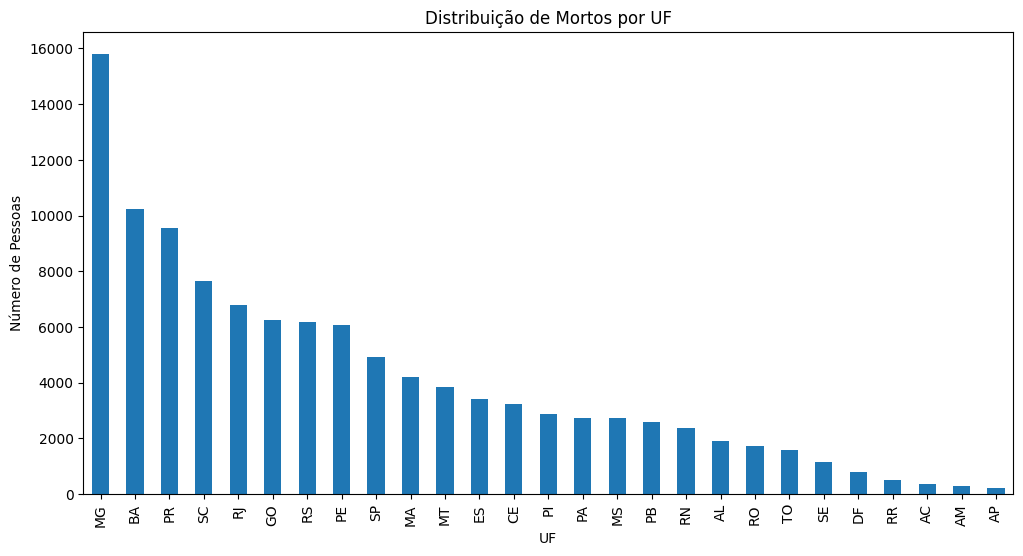

In [27]:
# 17) Visualização de dados utilizando Matplotlib - Gráfico sobre a quantidade de mortos em acidentes por Estado
df.groupby('UF')['Mortos'].sum().sort_values(ascending=False).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de Mortos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Pessoas')
plt.show()

* O Estado de Minas Gerais, lidera o ranking em quantidade de mortos em acidentes nas suas rodovias. Um dos motivos seria a quantidade de Rodovias Federais que cortam o Estado, sendo que uma delas a BR 381, também conhecida como a "Rodovia da Morte".
Observamos também que Minas Gerais lidera a quantidade de acidentes por capotamento.
* Já a Bahia, se destaca em segundo lugar em número de mortos.



In [28]:
# 11) Agrupamento
# Filtrando apenas as ocorrências por tipo de acidente : "capotamento"
ocorrencias_capotamento = df[df['Tipo'].str.contains('Capotamento', case=False, na=False)]

# Agrupando por Estado e tipo
ocorrencias_por_estado = ocorrencias_capotamento[['UF', 'Tipo']].groupby(['UF', 'Tipo']).size().reset_index(name='Ocorrencias')
ocorrencias_por_estado = ocorrencias_por_estado.sort_values(by='Ocorrencias', ascending=False).head(10)

# Exibir
ocorrencias_por_estado

,UF,Tipo,Ocorrencias
10,MG,Capotamento,17505
17,PR,Capotamento,9482
25,SP,Capotamento,9187
23,SC,Capotamento,8305
4,BA,Capotamento,8015
18,RJ,Capotamento,7485
8,GO,Capotamento,4659
15,PE,Capotamento,4497
7,ES,Capotamento,2458
22,RS,Capotamento,2442


In [29]:
#11) Agrupamento,
#Causas de acidentes por Estado
ocorrencias_por_estado = df[['UF', 'Causa']].groupby(['UF', 'Causa']).size().reset_index(name='Ocorrencias')
ocorrencias_por_estado = ocorrencias_por_estado.sort_values(by='Ocorrencias', ascending=False).head(10)
ocorrencias_por_estado


,UF,Causa,Ocorrencias
1758,SC,Falta de Atenção,85935
1401,RJ,Outras,76125
777,MG,Outras,72827
755,MG,Falta de Atenção,71533
1297,PR,Falta de Atenção,68852
1675,RS,Falta de Atenção,49204
801,MG,Velocidade Incompatível,48769
1930,SP,Outras,47887
1909,SP,Falta de Atenção,40028
1379,RJ,Falta de Atenção,39860


 A falta de atenção é a causa mais comum de acidentes no Brasil. Mostrando a necessidade de campanhas de conscientização quanto aos riscos da distração ao volante.

In [30]:
# 14) Encontrar maior valores
# 10 primeiras Causas de acidente mais frequente
contagem_acidentes = df['Causa'].value_counts()
contagem_acidentes = contagem_acidentes[:10]
contagem_acidentes

Falta de Atenção                      615230
Outras                                451223
Velocidade Incompatível               174857
Não guardar distância de segurança    157911
Defeito Mecânico no Veículo            78774
Desobediência à sinalização            63685
Ingestão de álcool pelo condutor       61434
Condutor Dormindo                      56411
Animais na Pista                       51492
Ultrapassagem Indevida                 44153
Name: Causa, dtype: int64

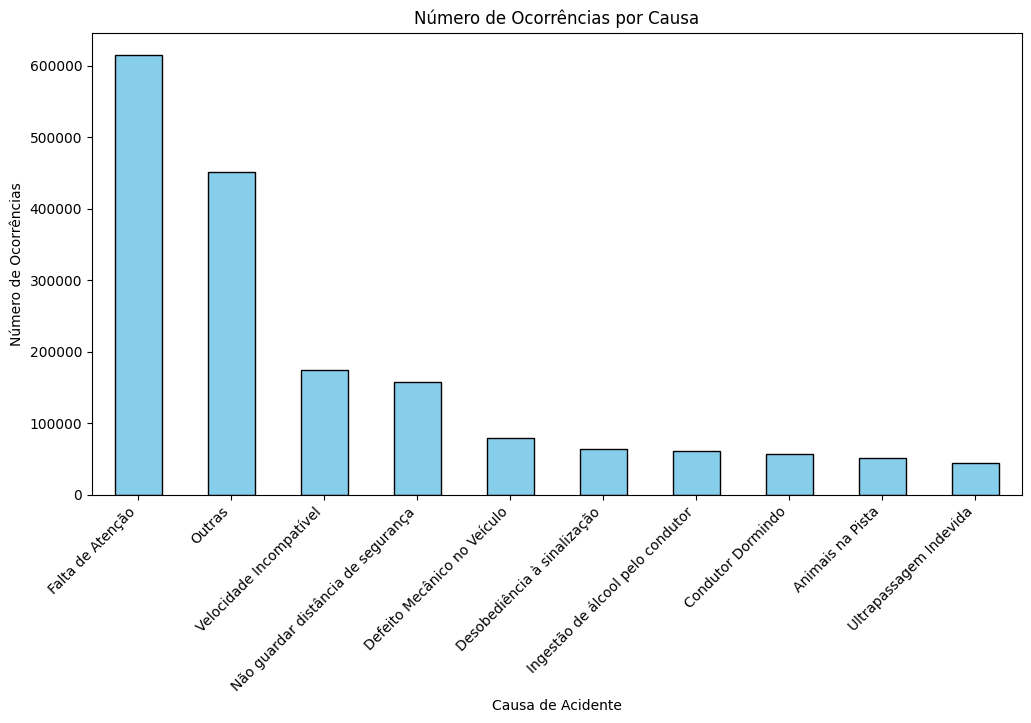

In [31]:
# 17) Visualização de dados utilizando Matplotlib
# Criando um gráfico de barras das causas de acidentes
plt.figure(figsize=(12, 6))
contagem_acidentes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Ocorrências por Causa')
plt.xlabel('Causa de Acidente')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.show()

A falta de atenção como principal causa de acidentes, pode está ligada ao uso celular e outras distrações dentro do veículo. Sendo necessário a intensificação das fiscalizações e a conscientização do motorista quanto a importância de manter o foco enquanto está dirigindo.

In [32]:
# 11) Agrupamento
#Verificando a quantidade de acidentes por Município  e causas
ocorrencias_por_causa = df[['Municipio', 'Causa']].groupby(['Municipio', 'Causa']).size().reset_index(name='Número de Acidentes').sample(6)
ocorrencias_por_causa

,Municipio,Causa,Número de Acidentes
30073,MIRACATU,Animais na Pista,36
35514,PAVERAMA,Animais na Pista,1
40276,RIO BRILHANTE,Velocidade Incompatível,59
47901,SIMOES FILHO,Modificação proibida,1
9134,CAMPO MAIOR,Acessar a via sem observar a presença dos outr...,9
50107,TRES PASSOS,Outras,16


Através da análise dos dados das causas e dos tipos de acidentes, é possível desenvolver ações para diminuir o número de ocorrências futuras.

In [33]:
# 11) Agrupamento, 14) Encontrar maior valores
# Acidentes por municipio
(df["Municipio"].value_counts(normalize=True).map("{:.1%}".format))[:5]

CURITIBA           1.4%
SAO JOSE           1.1%
GUARULHOS          1.0%
DUQUE DE CAXIAS    1.0%
BETIM              1.0%
Name: Municipio, dtype: object

Os Múnicipios de Curitiba, São José e Guarulhos são as 3 cidades com maior índice de acidentes do Brasil em rodovias federais.

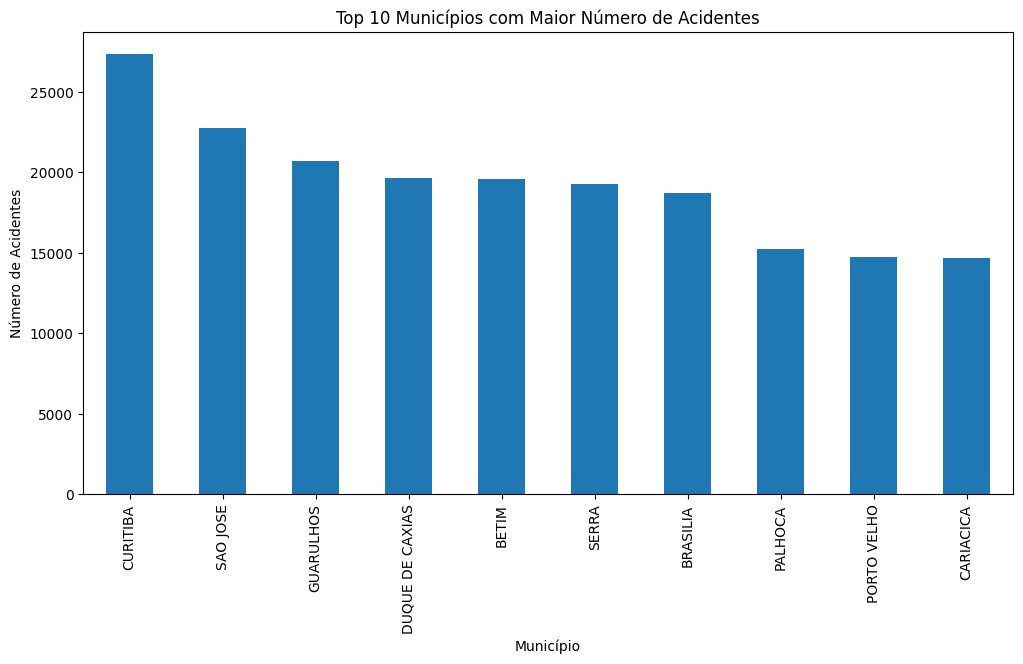

In [34]:
# 17) Visualização de dados utilizando Matplotlib
#Gráfico com os 10 municipios com maior quantidade de acidentes
df['Municipio'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Municípios com Maior Número de Acidentes')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.show()

In [35]:
# 11) Agrupamento
#verificando as 2 principais causas de acidentes no Município de Curitiba
ocorrencias_por_causa = df[['Municipio', 'Causa']].groupby(['Municipio', 'Causa']).size().reset_index(name='Número de Acidentes')

ocorrencias_curitiba = ocorrencias_por_causa[ocorrencias_por_causa['Municipio'] == 'CURITIBA']
ocorrencias_curitiba_ordenadas = ocorrencias_curitiba.sort_values(by='Número de Acidentes', ascending=False)
ocorrencias_curitiba_ordenadas[:2]

,Municipio,Causa,Número de Acidentes
14468,CURITIBA,Falta de Atenção,10692
14483,CURITIBA,Não guardar distância de segurança,4045


 Os dados mostraram que os principais motivos para Curitiba liderar o topo em acidentes são:


* Falta de atenção com 10692 ocorrências.
* Não guardar distância de segurança com 4045 ocorrências.

In [36]:
# 11) Agrupamento, 16) Manipulação de datas e 13) Aplicar funções e lambdas
#Verificando por Estados e dia da semana a quantidade de acidentes com feridos graves
df[['UF', 'Dia', 'Feridos Graves']].groupby(['UF', 'Dia',]).mean().applymap(lambda x: "{:.1%}".format(x))

Feridos Graves
UF Dia                   
AC Domingo          38.7%
   Quarta           24.8%
   Quinta           23.6%
   Segunda          24.8%
   Sexta            25.8%
...                   ...
TO Quinta           26.2%
   Segunda          26.4%
   Sexta            26.3%
   Sábado           32.4%
   Terça            25.1%

[189 rows x 1 columns]

Nessa análise, conseguimos ver em cada estado qual dia da semana ocorre mais acidentes com feridos graves. Percebemos que em cada Estado há um padrão diferente de dias que ocorreram acidentes graves. Dessa forma, para cada Estado teria intervenções específicas.

In [37]:
# 16) Manipulação de datas
# Quantidade de acidentes por dia da semana
acidentes_por_dia_semana = df.groupby(df['Dia']).size().sort_values(ascending=False)
acidentes_por_dia_semana

Dia
Sexta      319313
Sábado     313093
Domingo    300456
Segunda    271756
Quinta     268902
Quarta     257865
Terça      249932
dtype: int64

Em geral, sexta-feira é o dia que mais ocorre acidentes. Seguido de sábado e domingo, indicando relação com finais de semana.

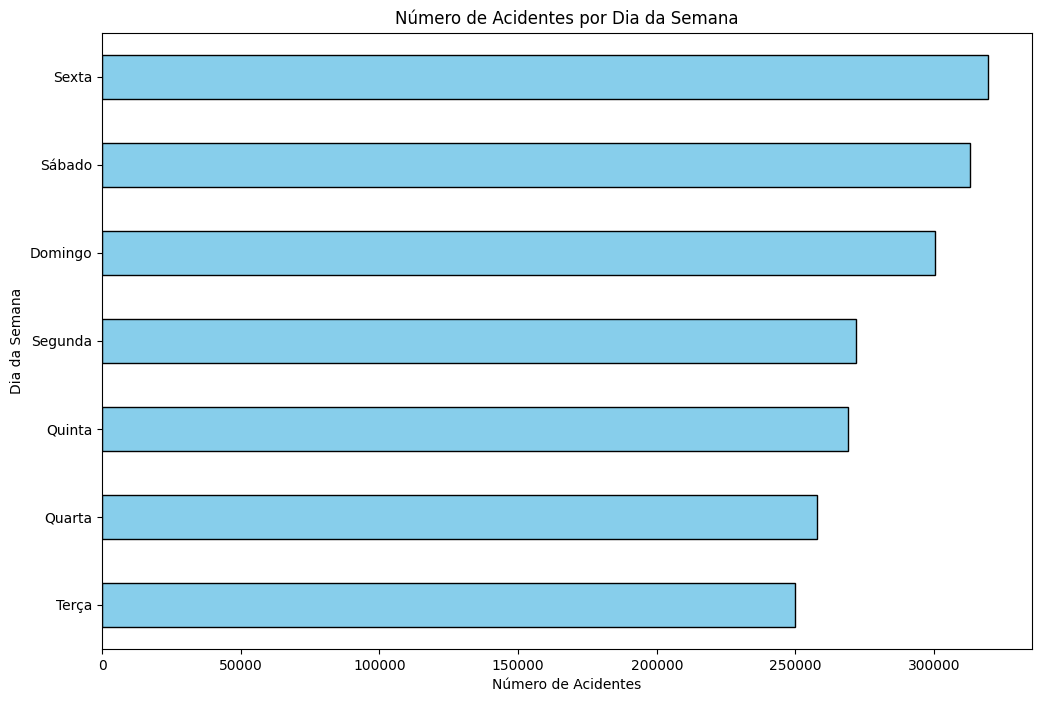

In [38]:
# 17) Visualização de dados utilizando Matplotlib e 14) Encontrar maior/menores valores  --
#Grafico mostrando a quantidade de acidentes por dia da semana
plt.figure(figsize=(12, 8))
acidentes_por_dia_semana.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Número de Acidentes')
plt.ylabel('Dia da Semana')
plt.show()

Podemos ver que terça-feira é o dia com o menor número de ocorrências.



In [39]:
#11) Agrupamento - Quantidade de acidentes por horário
acidentes_por_horario = df.groupby(df['Horario']).size()
acidentes_por_horario = acidentes_por_horario.sort_values(ascending=False)[:20]
acidentes_por_horario


Horario
18:00:00    31116
19:00:00    30721
18:30:00    30114
17:00:00    27543
16:00:00    27280
17:30:00    25808
15:00:00    25542
16:30:00    24261
08:00:00    22827
19:30:00    22797
15:30:00    22773
14:00:00    22366
07:30:00    21793
20:00:00    21421
09:00:00    21076
10:00:00    20767
11:00:00    20384
14:30:00    20356
07:00:00    20165
08:30:00    19613
dtype: int64

A faixa de horário que mais ocorre acidente é das 18:00 às 19:00. O que pode estar relacionado ao aumento de fluxo de veículos.
Enquanto o horário de 08:30 é o que possui menos ocorrências.

In [40]:
# 11) Agrupamento e 12) Criar novas colunas - Quantidade de acidentes por clima e tipo
ocorrencias_por_combinacao = df[['Clima', 'Tipo']].groupby(['Clima', 'Tipo']).size().reset_index(name='ocorrencias')
ocorrencias_por_combinacao

,Clima,Tipo,ocorrencias
0,Ceu Claro,Atropelamento de Animal,5136
1,Ceu Claro,Atropelamento de Pedestre,11958
2,Ceu Claro,Atropelamento de animal,22447
3,Ceu Claro,Atropelamento de pessoa,25205
4,Ceu Claro,Capotamento,39478
...,...,...,...
259,Vento,Queda de motocicleta / bicicleta / veículo,172
260,Vento,Queda de ocupante de veículo,44
261,Vento,Saída de Pista,532
262,Vento,Saída de leito carroçável,112


In [41]:
# 11) Agrupamento, 12) Criar novas colunas e 14) Encontrar maiores valores
#Filtrando os acidentes por clima e tipo
ocorrencias_por_combinacao = ocorrencias_por_combinacao[ocorrencias_por_combinacao['Clima'] == 'Ceu Claro']
ocorrencias_por_combinacao = ocorrencias_por_combinacao.sort_values(by='ocorrencias', ascending=False)[:3]
ocorrencias_por_combinacao

,Clima,Tipo,ocorrencias
17,Ceu Claro,Colisão traseira,263661
13,Ceu Claro,Colisão lateral,152435
27,Ceu Claro,Saída de Pista,88688


* Os dados mostraram que quando o clima está 'Ceu Claro' ou 'Nublado', o tipo de acidente mais comum é a colisão traseira, seguido da colisão lateral e saída de pista.

* Enquanto nas condições de 'chuva' ou 'Nevoeiro/Neblina' o tipo de acidente mais comum é a saída de pista. Relacionando esse tipo de acidente ao período chuvoso.

In [42]:
# 16) Manipulação de datas e 14) Encontrar maior/menores valores
#Averiguando a quantidade de acidentes por ano.
acidentes_por_ano = df['Ano'].value_counts().sort_values(ascending=False)
acidentes_por_ano

2011    192326
2013    186748
2012    184568
2010    183469
2014    169201
2009    158646
2008    141043
2007    127675
2015    122161
2016     96363
2017     89567
2018     69332
2019     67556
2022     64547
2021     64539
2020     63576
Name: Ano, dtype: int64

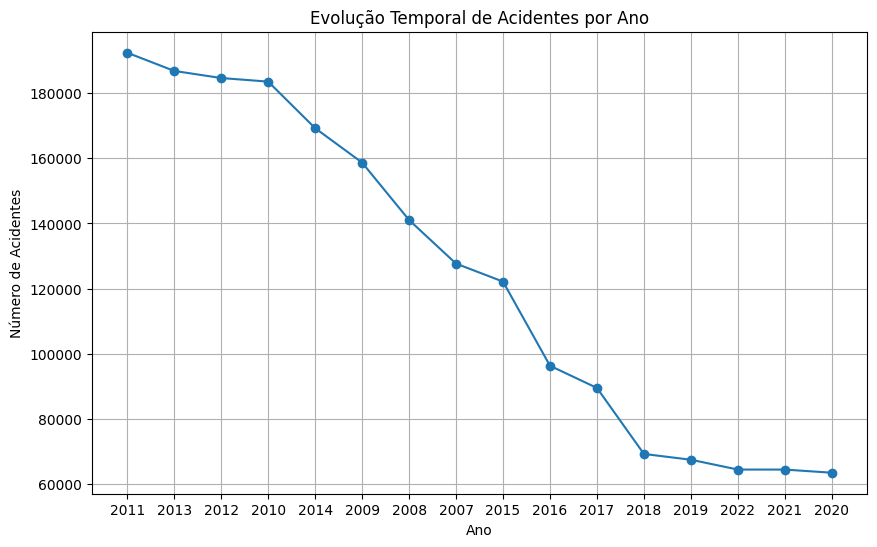

In [43]:
# 17) Visualização de dados utilizando Matplotlib
#grafico com a evolução de acidentes por ano
plt.figure(figsize=(10, 6))
plt.plot(acidentes_por_ano.index, acidentes_por_ano.values, marker='o', linestyle='-')
plt.title('Evolução Temporal de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.grid(True)
plt.show()

Através da análise dos dados, concluimos que o ano com o maior número de acidentes foi 2011, seguido de 2013. A partir de 2014, percebemos uma redução na quantidade de acidentes.

In [44]:
# 11) Agrupamento
#Mostrando a relação entre o tipo de pista, forma geométrica com a quantidade de vítimas fatais
resultados = df[['Pista', 'Tracado', 'classificacao_acidente']].groupby(['Pista', 'Tracado', 'classificacao_acidente']).size().reset_index(name='ocorrencias')
resultados_com_vitimas_fatais = resultados[resultados['classificacao_acidente'] == 'Com Vítimas Fatais']
resultados_ordenados = resultados_com_vitimas_fatais.sort_values(by='ocorrencias', ascending=False)
resultados_ordenados


,Pista,Tracado,classificacao_acidente,ocorrencias
92,Simples,Reta,Com Vítimas Fatais,43553
20,Dupla,Reta,Com Vítimas Fatais,17638
76,Simples,Curva,Com Vítimas Fatais,15350
4,Dupla,Curva,Com Vítimas Fatais,4006
56,Múltipla,Reta,Com Vítimas Fatais,2773
86,Simples,Não Informado,Com Vítimas Fatais,2552
72,Simples,Cruzamento,Com Vítimas Fatais,1094
14,Dupla,Não Informado,Com Vítimas Fatais,1059
80,Simples,Desvio Temporário,Com Vítimas Fatais,645
83,Simples,Interseção de vias,Com Vítimas Fatais,346


A maior quantidade de acidentes com vítimas fatais ocorre em pista reta. Porém, destacamos que em curvas a quantidade de acidentes também é alta, visto que nas rodovias brasileira há uma predominância maior de pistas retas.

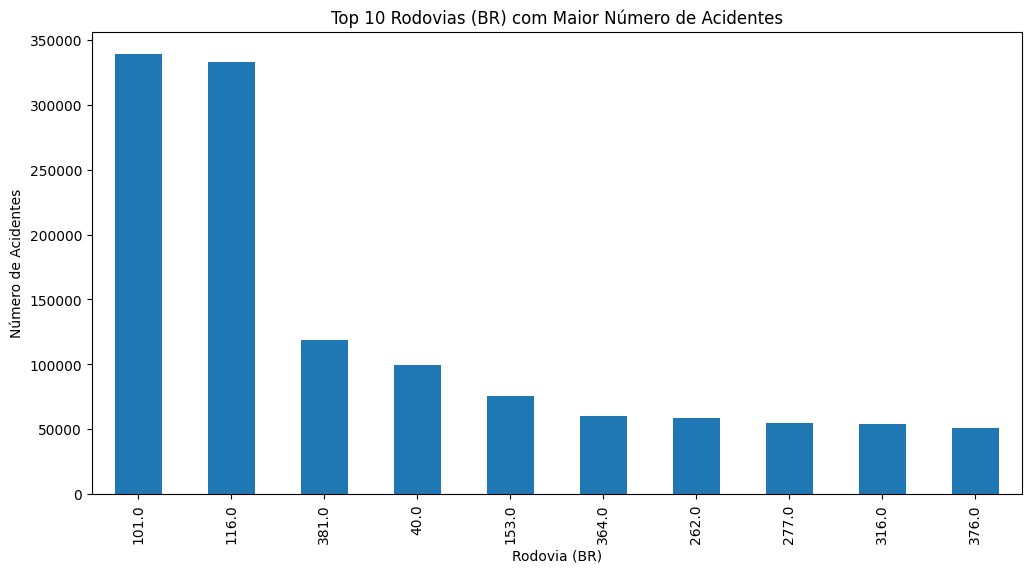

In [45]:
# 17) Visualização de dados utilizando Matplotlib
#Gráfico com as 10 rodovias com maior número de acidentes
df['BR'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Rodovias (BR) com Maior Número de Acidentes')
plt.xlabel('Rodovia (BR)')
plt.ylabel('Número de Acidentes')
plt.show()


No gráfico de barras, acima, podemos concluir que:


*  A BR 101 é a rodovia com o maior índice de acidentes.
*  Enquanto a BR 376 possui a menor quantidade de acidentes.
 Uma das possíveis razões para esse índice elevado, pode estar ligado a sua extensão. É considerada a maior rodovia do Brasil com 4 650 km de extensão. E em alguns trechos, ela é sobreposta pela BR 116 e BR 376.


*   Em segundo lugar em números de acidentes, está a BR 116, que é a segunda maoir rodovia do país, que liga Fortaleza a divisa com o Uruguai.








# CONCLUSÃO



Com base na análise dos dados de acidentes no Brasil, é evidente a urgência de medidas para reduzir a ocorrência desses eventos. Minas Gerais destaca-se como o estado com mais acidentes e mortes, especialmente na perigosa BR 381. A Bahia também apresenta alta mortalidade. A falta de atenção é a principal causa, destacando a necessidade de campanhas de conscientização e fiscalizações rigorosas. A análise por municípios destaca Curitiba, São José e Guarulhos como áreas críticas. Padrões diferentes de dias da semana indicam a necessidade de intervenções personalizadas. As condições climáticas e horários específicos também demandam atenção. Embora haja uma redução geral nos acidentes desde 2014, a continuidade dos esforços preventivos é vital. A BR 101 lidera em acidentes, enquanto a BR 376 tem a menor quantidade. Medidas educativas, fiscalização e melhorias na infraestrutura são cruciais para a segurança viária no Brasil.